Start by importing all the libraries we will be using for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Makes graph display in notebook
%matplotlib inline   

#ignore warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn()

#### Import my data

In [25]:
supermarket_data = pd.read_csv('train.csv')

In [3]:
supermarket_data.head()

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,DRA12,CHUKWUDI017,DRA12_CHUKWUDI017,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,DRA12,CHUKWUDI018,DRA12_CHUKWUDI018,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,DRA12,CHUKWUDI035,DRA12_CHUKWUDI035,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [4]:
#Displaty the number of rows and columns
supermarket_data.shape

(4990, 13)

In [5]:
supermarket_data.describe()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,Product_Supermarket_Sales
count,4188.000000,4990.000000,4990.000000,4990.000000,4990.000000
mean,12.908838,0.066916,391.803796,2004.783567,6103.520164
std,4.703256,0.053058,119.378259,8.283151,4447.333835
min,4.555000,0.000000,78.730000,1992.000000,83.230000
25%,8.767500,0.027273,307.890000,1994.000000,2757.660000
50%,12.600000,0.053564,393.860000,2006.000000,5374.675000
75%,17.100000,0.095358,465.067500,2011.000000,8522.240000
max,21.350000,0.328391,667.220000,2016.000000,32717.410000


In [6]:
supermarket_data.dtypes

Product_Identifier                 object
Supermarket_Identifier             object
Product_Supermarket_Identifier     object
Product_Weight                    float64
Product_Fat_Content                object
Product_Shelf_Visibility          float64
Product_Type                       object
Product_Price                     float64
Supermarket_Opening_Year            int64
Supermarket _Size                  object
Supermarket_Location_Type          object
Supermarket_Type                   object
Product_Supermarket_Sales         float64
dtype: object

In [7]:
supermarket_data.head(2)

,Product_Identifier,Supermarket_Identifier,Product_Supermarket_Identifier,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,DRA12,CHUKWUDI010,DRA12_CHUKWUDI010,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,DRA12,CHUKWUDI013,DRA12_CHUKWUDI013,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69


In [8]:
#Remove Id columns
cols_2_remove = ['Product_Identifier', 'Supermarket_Identifier', 'Product_Supermarket_Identifier']

newdata = supermarket_data.drop(cols_2_remove, axis=1)

In [9]:
newdata.head()

,Product_Weight,Product_Fat_Content,Product_Shelf_Visibility,Product_Type,Product_Price,Supermarket_Opening_Year,Supermarket _Size,Supermarket_Location_Type,Supermarket_Type,Product_Supermarket_Sales
0,11.6,Low Fat,0.068535,Soft Drinks,357.54,2005,NaN,Cluster 3,Grocery Store,709.08
1,11.6,Low Fat,0.040912,Soft Drinks,355.79,1994,High,Cluster 3,Supermarket Type1,6381.69
2,11.6,Low Fat,0.041178,Soft Drinks,350.79,2014,NaN,Cluster 2,Supermarket Type1,6381.69
3,11.6,Low Fat,0.041113,Soft Drinks,355.04,2016,Medium,Cluster 3,Supermarket Type2,2127.23
4,11.6,Ultra Low fat,0.000000,Soft Drinks,354.79,2011,Small,Cluster 2,Supermarket Type1,2481.77


In [10]:
newdata.shape

(4990, 10)

In [ ]:
cat_cols = ['Product_Fat_Content','Product_Type',
            'Supermarket _Size', 'Supermarket_Location_Type',
           'Supermarket_Type' ]

num_cols = ['Product_Weight', 'Product_Shelf_Visibility',
            'Product_Price', 'Supermarket_Opening_Year', 'Product_Supermarket_Sales']

## DATA VISUALIZATION
### BAR PLOT

In [ ]:
for col in cat_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  
    
    counts = newdata[col].value_counts() # find the counts for each unique category
    counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame
    ax.set_title('Bar plot for ' + col)



# Scatter plot for Numerical Features

In [ ]:
for col in num_cols:
    fig = plt.figure(figsize=(6,6)) # define plot area
    ax = fig.gca() # define axis  

    newdata.plot.scatter(x = col, y = 'Product_Supermarket_Sales', ax = ax)


### BOX PLOTS OF CATEGORICAL COLUMNS AGAINST TARGET COLUMN

In [ ]:
for col in cat_cols:
    sns.boxplot(col, 'Product_Supermarket_Sales', data=newdata)
    plt.xlabel(col) # Set text for the x axis
    plt.ylabel('Product Supermarket Sales')# Set text for y axis
    plt.show()
  

### MORE VISUALIZATION

In [ ]:
#CORRELATION MATRIX AMONG FEATURES
corrmat = newdata.corr()
f,ax = plt.subplots(figsize=(5,4))
sns.heatmap(corrmat, square=True)

### PAIR PLOT OF COLUMNS WITHOUT MISSING VALUES

In [ ]:
all_cols

In [ ]:
cat_cols_pair = ['Product_Fat_Content','Product_Type','Supermarket_Location_Type', 'Supermarket_Type' ]

cols_2_pair = ['Product_Fat_Content',
             'Product_Shelf_Visibility',
             'Product_Type',
             'Product_Price',
             'Supermarket_Opening_Year',
             'Supermarket_Location_Type',
             'Supermarket_Type',
             'Product_Supermarket_Sales']

for col in cat_cols_pair:
    sns.set()
    plt.figure()
    sns.pairplot(newdata[cols_2_pair], height=3.0, hue=col)
    plt.show()

## FEATURE ENGINEERING

### 1. New Feature Creation

When exploring our data, we proposed to create some new features. 

The first feature was a Boolean class to separate Normal Fat from the other classes. Let's do that below.

In [12]:
#print out all unique values
newdata['Product_Fat_Content'].unique()

array(['Low Fat', 'Ultra Low fat', 'Normal Fat'], dtype=object)

In [13]:
fat_content_dict = {'Low Fat': 0, 'Ultra Low fat': 0, 'Normal Fat': 1}
newdata['is_normal_fat'] = newdata['Product_Fat_Content'].map(fat_content_dict)
#Preview the values
newdata['is_normal_fat'].value_counts()

0    3217
1    1773
Name: is_normal_fat, dtype: int64

Another feature we'll create is a column that captures the year of opening. This feature will separate Supermarket_Opening_Year into the 90s and 2000s.

In [14]:
#Assign year 2000 and above as 1, 1996 and below as 0

def cluster_open_year(year):
    if year <= 1996:
        return 0
    else:
        return 1
    
newdata['open_in_the_2000s'] = newdata['Supermarket_Opening_Year'].apply(cluster_open_year)

In [15]:
#Preview created feature
newdata[['Supermarket_Opening_Year', 'open_in_the_2000s']].head(4)

,Supermarket_Opening_Year,open_in_the_2000s
0,2005,1
1,1994,0
2,2014,1
3,2016,1


Another feature we will create is one that groups the  Product type into 2 classes. class 1 will hold Household, Health Hygiene and others categories while class 0 will hold the remaining categories.

In [16]:
#Get the unique categories in the column as a list
prod_type_cats = list(newdata['Product_Type'].unique())
#remove the class 1 categories
prod_type_cats.remove('Health and Hygiene')
prod_type_cats.remove('Household')
prod_type_cats.remove('Others')

def cluster_prod_type(product):
    if product in prod_type_cats:
        return 0
    else:
        return 1
    
newdata['Product_type_cluster'] = newdata['Product_Type'].apply(cluster_prod_type)

In [17]:
newdata[['Product_Type', 'Product_type_cluster']].tail(10)

,Product_Type,Product_type_cluster
4980,Health and Hygiene,1
4981,Health and Hygiene,1
4982,Health and Hygiene,1
4983,Household,1
4984,Household,1
4985,Household,1
4986,Household,1
4987,Household,1
4988,Household,1
4989,Household,1


### Transforming skewed features

During our EDA, we identified that Product_Supermarket_Sales and Product_Shelf_Visibility where right skewed, and we proposed to log transform them into a normal distribution.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Transformation of Product_Supermarket_Sales feature')

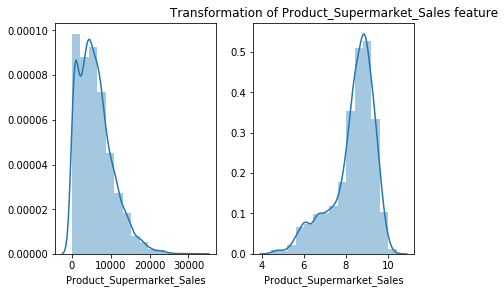

In [18]:
fig, ax = plt.subplots(1,2)
#plot of normal Product_Supermarket_Sales on the first axis
sns.distplot(newdata['Product_Supermarket_Sales'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Supermarket_Sales'] = np.log1p(newdata['Product_Supermarket_Sales'])
sns.distplot(newdata['Product_Supermarket_Sales'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Supermarket_Sales feature")

__Next, let's transform Product_Shelf_Visibility__

Text(0.5, 1.0, 'Transformation of Product_Shelf_Visibility feature')

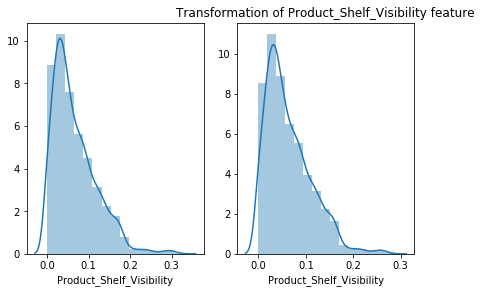

In [19]:
fig, ax = plt.subplots(1,2)
#plot of normal Product_Supermarket_Sales on the first axis
sns.distplot(newdata['Product_Shelf_Visibility'], bins=15, ax=ax[0])

#Transform the Product_Supermarket_Sales and plot on the second axis
newdata['Product_Shelf_Visibility'] = np.log1p(newdata['Product_Shelf_Visibility'])
sns.distplot(newdata['Product_Shelf_Visibility'], bins=15, ax=ax[1])

plt.tight_layout()
plt.title("Transformation of Product_Shelf_Visibility feature")

There's no significant change in this feature when we apply the Log transform. This is because the values are mostly close to zero. There exist advance ways we could use to transform features like this, but we'll stick with this in this post. Interested readers can find advanced methods here.

### HANDLING CATEGORICAL FEATURES

Next we''ll handle all categorical columns, but first I'll explain some important concepts that'll help us here.

__Categorical Encoding, what is it?__

Categorical variables are used to represent categories or classes. For instance the Product_Type column in our data set is a categorical variable with 3 classes (Low Fat, Ultra Low Fat and Normal Fat).

Categorical encodings are methods used to to turn non numerical features/variables to numbers. There are various ways to perform categorical encoding but it may depend on the type of categorical variable we're dealing with. 

The two categorical types we usually consider before doing encodings are ordinal and nonordinal/nominal categories. 

Understanding the difference between these two types is important before picking an encoding scheme. Let's understand them first.

__Ordinal Categoricals:__ These are categories that can be ordered in sequence of magnitude. i.e we can arrange the classes in such a way that one class can have a greater magnitude than the other. 
For instance the feature SuperMarket_Size in our dataset is an ordinal categorical because the class label High is greater than Medium which in turn is greater than Small. So if we encode these features, we should definitely assign a greater class number to the High class.

__{High : 3, Medium: 2, Small: 1}__

__Nonordinal Categoricals__ These categories have no meaningful difference in magnitude. i.e one class label is not greater than the other. For Instance, in the feature Product_Type, Soft drink is not greater than Household, nor is the Health and Hygiene class greater than the Diary class.

##### NOW LET'S TALK ABOUT SOME TYPES OF ENCODING
Encoding for categorical features with small number of classes, typically less than 15

__One-Hot Encoding:__ In one hot encoding, we use a group of bits to represent a class, where only one class can be activated at a specific time. Consider the feature Supermarket_Location_Type in our data set, this feature has three classes (cluster 1, cluster 2 and cluster 3). We can one-hot encode this feature using three bits as shown below.

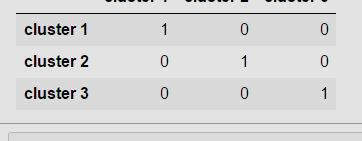

Here, we can see that we used 3 bits where one and only one class can be activated at a time. 



__Dummy Encoding:__ Dummy encoding is the same as One-Hot Encoding, the only difference is that in dummy encoding, we use one less bit than One-Hot encoding. I.e, we have a class with all zero bit. The difference is subtle and both methods can be used interchangeably.

__Encoding for categorical features with large number of classes, typically greater than 15__

__Label Encoding:__ In Label Encoding, we simply assign integers, say 1 to n (n = number of classes) to each category. This usually result in an order-able feature.

__Note:__ Some Machine Learning models like Tree or Linear Models can perform well with this type of encoding because trees do not work with magnitudes of data points. But this would affect Neural Nets and Distance based models like KNN which take into consideration the magnitude of data points.

Other Advance but effective encoding schemes are Embeddings, Feature Hashing and Bin Counting.

#### ENCODING OF FEATURES

In [23]:
for col in cat_cols:
    print('Value Count for', col)
    print(newdata[col].value_counts())
    print("---------------------------")

Value Count for Product_Fat_Content
Low Fat          3039
Normal Fat       1773
Ultra Low fat     178
Name: Product_Fat_Content, dtype: int64
---------------------------
Value Count for Product_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: Product_Type, dtype: int64
---------------------------
Value Count for Supermarket _Size
Medium    1582
Small     1364
High       594
Name: Supermarket _Size, dtype: int64
---------------------------
Value Count for Supermarket_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: Supermarket_Location_Type, dt

Now, looking at our features, the column with the highest number of classes is the Product_Type column (15). In this case we can use the one-hot-encoding scheme since our data is small (approx 5000) and the unique categories are also small.

Use the pandas get_dummies function when working smaller categories__

In [54]:
#save the target value to a new variable
y_target = newdata['Product_Supermarket_Sales']
newdata.drop(['Product_Supermarket_Sales'], axis=1, inplace=True)

#one hot encode using pandas dummy function
dummified_data = pd.get_dummies(newdata)
dummified_data.head()

,Product_Weight,Product_Shelf_Visibility,Product_Price,Supermarket_Opening_Year,is_normal_fat,open_in_the_2000s,Product_type_cluster,Product_Fat_Content_Low Fat,Product_Fat_Content_Normal Fat,Product_Fat_Content_Ultra Low fat,...,Supermarket _Size_High,Supermarket _Size_Medium,Supermarket _Size_Small,Supermarket_Location_Type_Cluster 1,Supermarket_Location_Type_Cluster 2,Supermarket_Location_Type_Cluster 3,Supermarket_Type_Grocery Store,Supermarket_Type_Supermarket Type1,Supermarket_Type_Supermarket Type2,Supermarket_Type_Supermarket Type3
0,11.6,0.066289,357.54,2005,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,11.6,0.040097,355.79,1994,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,11.6,0.040352,350.79,2014,0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,11.6,0.040290,355.04,2016,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
4,11.6,0.000000,354.79,2011,0,1,0,0,0,1,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
# from sklearn.preprocessing import LabelEncoder

In [ ]:
# for cat in cat_cols:
#     lb = LabelEncoder()
#     lb.fit(list(newdata[cat].values))
#     newdata[cat] = lb.transform(list(newdata[cat].values))

## Fill in Missing Values

Print out columns with missing values

In [55]:
dummified_data.shape

(4990, 36)

In [56]:
#Print null columns
dummified_data.isnull().sum()

Product_Weight                         802
Product_Shelf_Visibility                 0
Product_Price                            0
Supermarket_Opening_Year                 0
is_normal_fat                            0
open_in_the_2000s                        0
Product_type_cluster                     0
Product_Fat_Content_Low Fat              0
Product_Fat_Content_Normal Fat           0
Product_Fat_Content_Ultra Low fat        0
Product_Type_Baking Goods                0
Product_Type_Breads                      0
Product_Type_Breakfast                   0
Product_Type_Canned                      0
Product_Type_Dairy                       0
Product_Type_Frozen Foods                0
Product_Type_Fruits and Vegetables       0
Product_Type_Hard Drinks                 0
Product_Type_Health and Hygiene          0
Product_Type_Household                   0
Product_Type_Meat                        0
Product_Type_Others                      0
Product_Type_Seafood                     0
Product_Typ

In [57]:
# Compute the mean
mean_pw = dummified_data['Product_Weight'].mean()
#Fill the missing values with calculated mean
dummified_data['Product_Weight'].fillna(mean_pw, inplace=True)

In [58]:
#Check if filling is successful
dummified_data.isnull().sum()

Product_Weight                         0
Product_Shelf_Visibility               0
Product_Price                          0
Supermarket_Opening_Year               0
is_normal_fat                          0
open_in_the_2000s                      0
Product_type_cluster                   0
Product_Fat_Content_Low Fat            0
Product_Fat_Content_Normal Fat         0
Product_Fat_Content_Ultra Low fat      0
Product_Type_Baking Goods              0
Product_Type_Breads                    0
Product_Type_Breakfast                 0
Product_Type_Canned                    0
Product_Type_Dairy                     0
Product_Type_Frozen Foods              0
Product_Type_Fruits and Vegetables     0
Product_Type_Hard Drinks               0
Product_Type_Health and Hygiene        0
Product_Type_Household                 0
Product_Type_Meat                      0
Product_Type_Others                    0
Product_Type_Seafood                   0
Product_Type_Snack Foods               0
Product_Type_Sof

### SPLIT OUR DATA INTO TRAIN AND TEST SETS

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dummified_data, y_target, test_size = 0.3)

print("Training data is", X_train.shape)
print("Training target is", y_train.shape)
print("test data is", X_test.shape)
print("test target is", y_test.shape)

Training data is (3493, 36)
Training target is (3493,)
test data is (1497, 36)
test target is (1497,)


## PERFORM FEATURE NORMALIZATION/ SCALING

In [60]:
from sklearn.preprocessing import RobustScaler #Import scaler
scaler = RobustScaler() #create an object from RobustScaler

scaler.fit(X_train) #Fit to the train data only!

#Perform the transformation on train and test data
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

X_train[:5, :5] #Preview the first five rows and columns of train data

array([[-0.53082981,  0.10926888, -0.14673843,  0.        ,  0.        ],
       [ 0.48011111, -0.80841352,  0.54068948,  0.29411765,  0.        ],
       [ 0.59681425,  1.14428271,  0.22183775,  0.58823529,  0.        ],
       [-0.58042864, -0.3801553 , -0.04049724, -0.11764706,  0.        ],
       [ 0.        ,  0.39650076, -0.13546072, -0.82352941,  0.        ]])

### MODELLING

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### USING A LINEAR REGRESSION

In [ ]:
lr_model = LinearRegression() #create an object
lr_model.fit(X_train, y_train) # traing part

In [ ]:
predictions = lr_model.predict(X_test)

In [ ]:
#print error
lr_error = mean_absolute_error(predictions, y_test)
lr_error

### USING A DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=2)
dt_model.fit(X_train, y_train)

In [ ]:
pred = dt_model.predict(X_test)

In [ ]:
dt_error = mean_absolute_error(pred, y_test)
dt_error

### USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=60)
knn_model.fit(X_train, y_train)

In [ ]:
knn_prediction = knn_model.predict(X_test)

In [ ]:
knn_error = mean_absolute_error(knn_prediction, y_test)
knn_error

### USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, max_depth=5)
rf_model.fit(X_train, y_train)

In [ ]:
rf_pred = rf_model.predict(X_test)

In [ ]:
rf_error = mean_absolute_error(rf_pred, y_test)
rf_error

### USING BOOSTING TECHNIQUES

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada_model = AdaBoostRegressor(n_estimators=150)
ada_model.fit(X_train, y_train)

In [ ]:
ada_pred = ada_model.predict(X_test)

In [ ]:
ada_error = mean_absolute_error(ada_pred, y_test)
ada_error

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gb_model = GradientBoostingRegressor(n_estimators=1000,
                                     learning_rate=0.01)
gb_model.fit(X_train, y_train)

In [ ]:
gb_pred = gb_model.predict(X_test)

In [ ]:
gb_error = mean_absolute_error(gb_pred, y_test)
gb_error

### AVERAGING PREDICTIONS OF THREE MODELS

In [ ]:
avg_pred = (rf_pred + gb_pred + pred) / 3
avg_pred

In [ ]:
avg_error = mean_absolute_error(avg_pred, y_test)
avg_error

### WEIGHTED AVERAGE OF THREE MODELS

In [ ]:
weighted_avg_pred = (0.9 * rf_pred + 0.1 * gb_pred + 0.1 * pred)

In [ ]:
weighted_avg_error = mean_absolute_error(weighted_avg_pred, y_test)
weighted_avg_error